In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


frame = pd.read_csv(r'C:\Desk\day.csv')
frame.columns
frame.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


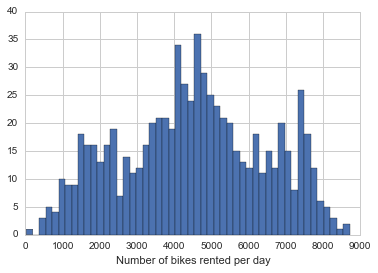

In [10]:
#Lets look at the distribution of data
plt.hist(frame.cnt, bins = 50)
plt.xlabel('Number of bikes rented per day')
plt.show()

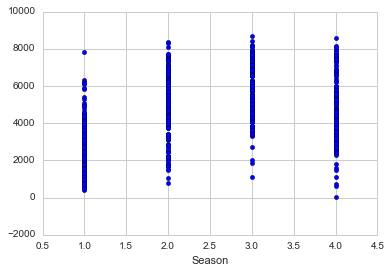

In [13]:
#scatter plot of data with respect to one feature
plt.scatter(frame.season, frame.cnt)
plt.xlabel('Season')
plt.show()

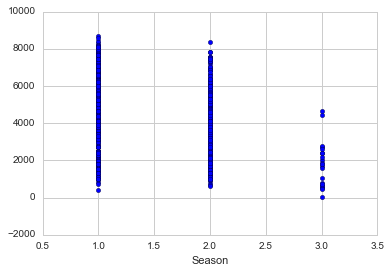

In [14]:
plt.scatter(frame.weathersit, frame.cnt)
plt.xlabel('Weather')
plt.show()

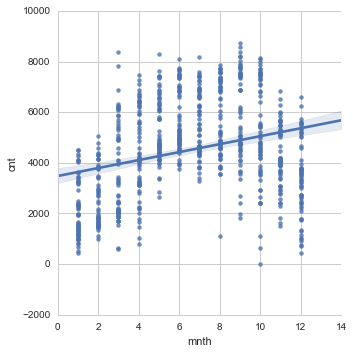

In [20]:
sns.lmplot('mnth', 'cnt', data=frame)


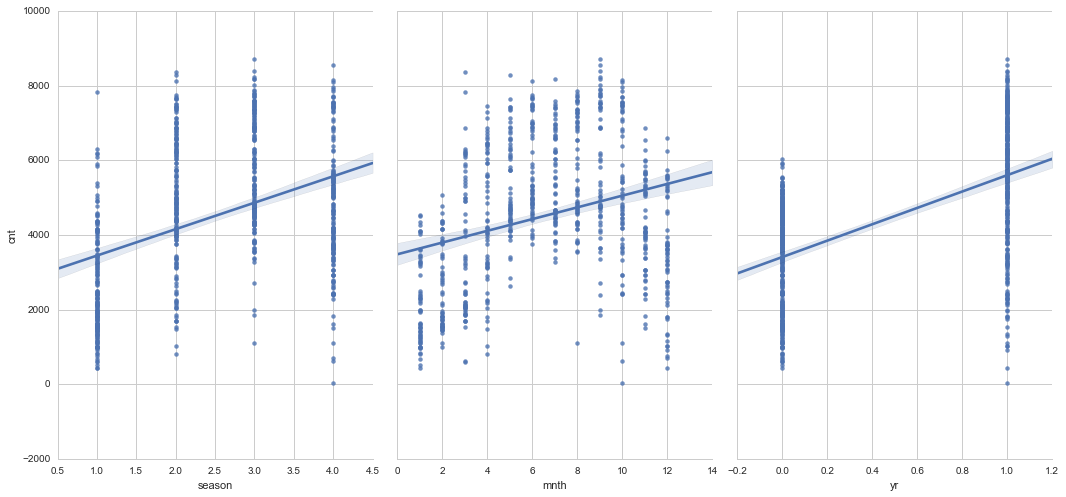

In [44]:
sns.pairplot(frame, x_vars=['season','mnth', 'yr'], y_vars = 'cnt',size = 7, aspect= 0.7, kind = 'reg')

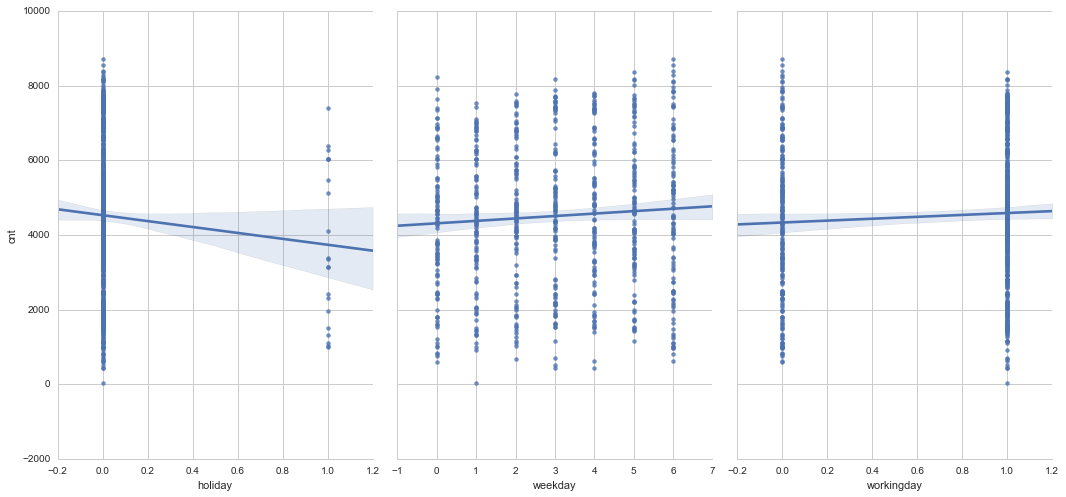

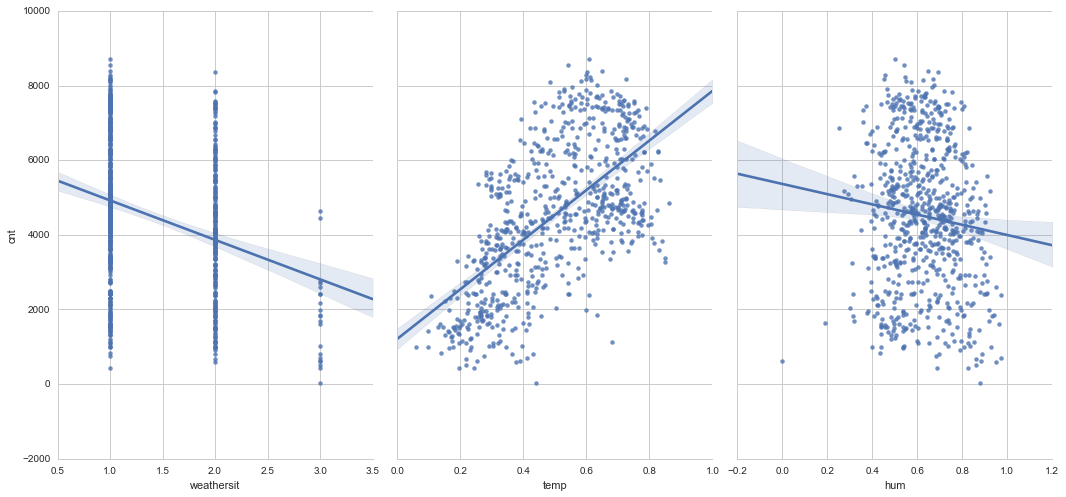

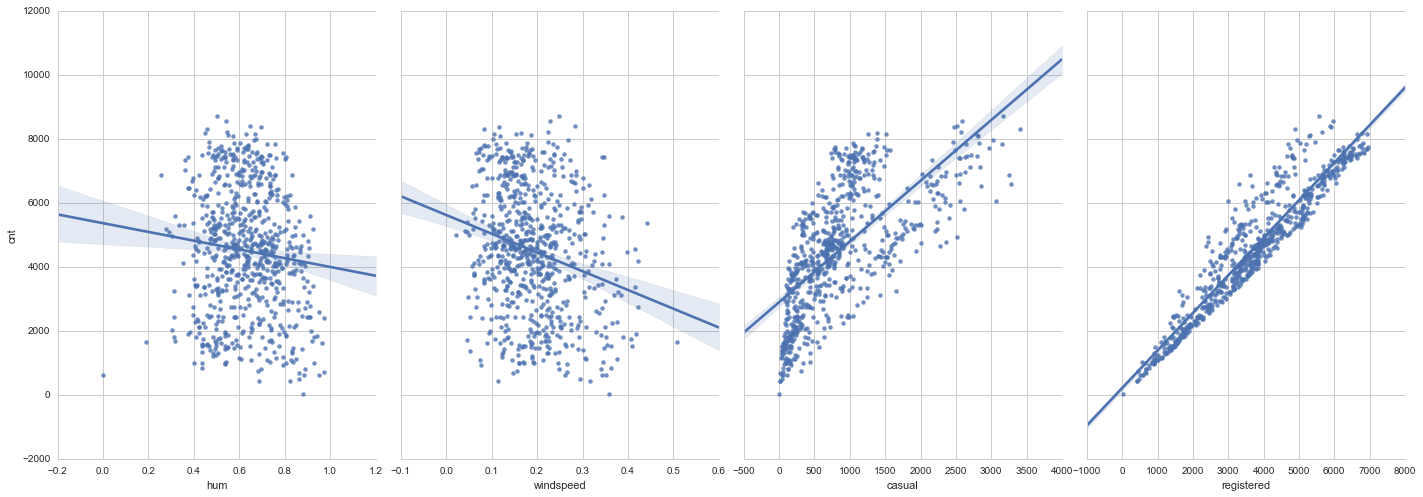

In [43]:
sns.pairplot(frame, x_vars=[ 'holiday', 'weekday', 'workingday'], y_vars = 'cnt',size = 7, aspect= 0.7, kind = 'reg')

sns.pairplot(frame, x_vars=['weathersit', 'temp', 'hum'], y_vars = 'cnt',size = 7, aspect= 0.7, kind = 'reg')

sns.pairplot(frame, x_vars=[ 'hum', 'windspeed', 'casual', 'registered'], y_vars = 'cnt',size = 7, aspect= 0.7, kind = 'reg')

In [49]:
feature_cols = ['registered','casual', 'windspeed','hum', 'temp', 'weathersit', 'weekday', 'holiday', 'workingday', 'season', 'mnth']
X = frame[feature_cols]
X.head()

,registered,casual,windspeed,hum,temp,weathersit,weekday,holiday,workingday,season,mnth
0,654,331,0.160446,0.805833,0.344167,2,6,0,0,1,1
1,670,131,0.248539,0.696087,0.363478,2,0,0,0,1,1
2,1229,120,0.248309,0.437273,0.196364,1,1,0,1,1,1
3,1454,108,0.160296,0.590435,0.200000,1,2,0,1,1,1
4,1518,82,0.186900,0.436957,0.226957,1,3,0,1,1,1


In [50]:
y = frame['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [51]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 )


In [52]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print linreg.intercept_
print linreg.coef_

-1.81898940355e-12
[  1.00000000e+00   1.00000000e+00   1.59171430e-13   1.22632725e-13
   1.19904087e-14  -5.45845378e-14   1.53558535e-14   4.09988108e-14
   3.50739403e-14   3.88563557e-14  -8.67865214e-15]


In [53]:
zip(feature_cols, linreg.coef_)

[('registered', 1.0000000000000004),
 ('casual', 1.0000000000000004),
 ('windspeed', 1.5917142956326305e-13),
 ('hum', 1.2263272537206549e-13),
 ('temp', 1.1990408665951691e-14),
 ('weathersit', -5.4584537844543091e-14),
 ('weekday', 1.5355853524509633e-14),
 ('holiday', 4.0998810808590179e-14),
 ('workingday', 3.5073940279906068e-14),
 ('season', 3.885635574147478e-14),
 ('mnth', -8.678652143722515e-15)]

In [55]:
y_pred = linreg.predict(X_test)
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

9.3620408619e-13


In [58]:
y_pred_train = linreg.predict(X_train)
print np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

9.72512678167e-13


In [59]:
X_train.shape

(548, 11)

In [62]:
n_x = np.array([[650, 300, 0.5, 0.19, 0.14, 3, 6, 0, 0, 1, 3]])
n_y = linreg.predict(n_x)

In [63]:
print n_y

[ 950.]


In [67]:
n_x = np.array([[650, 130, 0.10, 0.50, 0.34, 1, 6, 0, 0, 1, 3]])
n_y = linreg.predict(n_x)
print n_y

[ 780.]
